In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report


In [4]:
path = r'C:\Users\Admin\Downloads\new_dataset5.csv'

In [38]:
#Read csv file into dataframe
df = pd.read_csv(path)

In [39]:
df.head()

,Crop,Temperature,Rainfall,Humidity
0,Wheat,34,75,68
1,Wheat,34,75,71
2,Wheat,34,67,71
3,Field Pea,33,58,74
4,Wheat,35,86,68


In [40]:
enc = LabelEncoder()
df.iloc[:,0] = enc.fit_transform(df.iloc[:,0].values)

<h1> Outlier Removal </h1>

{'whiskers': [<matplotlib.lines.Line2D at 0x249e7be3fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x249e7bf0eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x249e7bf03c8>,
 'medians': [<matplotlib.lines.Line2D at 0x249e7bfa588>,
 'fliers': [<matplotlib.lines.Line2D at 0x249e7bfa8d0>,
 'means': []}

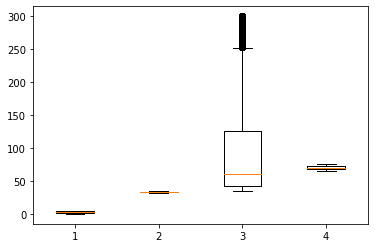

In [41]:
#Plotting to analyse outliers
plt.boxplot([df['Crop'], df['Temperature'],df['Rainfall'],df['Humidity']])

In [42]:
#Dropping the outliers from the dataframe
df.drop(df[(df['Rainfall'] > df['Rainfall'].quantile(0.75)) | (df['Rainfall'] < df['Rainfall'].quantile(0.25))].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x249e7c8bc50>,
 'caps': [<matplotlib.lines.Line2D at 0x249e7c99b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x249e7c8bfd0>,
 'medians': [<matplotlib.lines.Line2D at 0x249e7c99f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x249e7ca3518>,
 'means': []}

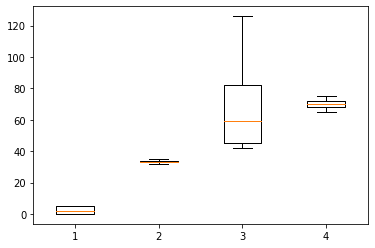

In [43]:
#Plotting after outlier removal
plt.boxplot([df['Crop'], df['Temperature'],df['Rainfall'],df['Humidity']])

<h1> Analysing the Effects of the Data Attributes</h1>

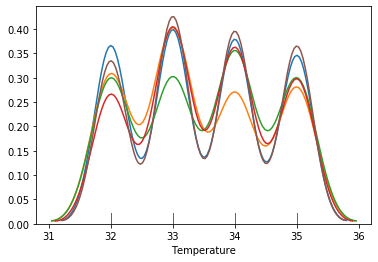

In [48]:
for i in range(0,6):
    sns.distplot(df[df['Crop']==i]['Temperature'], hist=False, rug=True)

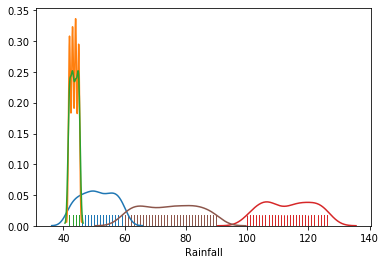

In [49]:
for i in range(0,6):
    sns.distplot(df[df['Crop']==i]['Rainfall'], hist=False, rug=True)

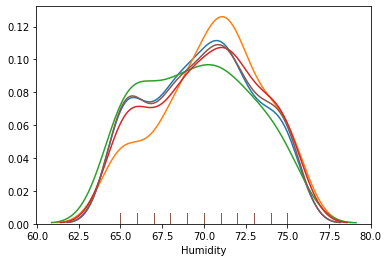

In [50]:
for i in range(0,6):
    sns.distplot(df[df['Crop']==i]['Humidity'], hist=False, rug=True)

In [7]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [8]:
#Performing label encoding for classes 
enc = LabelEncoder()
y = enc.fit_transform(y)

In [9]:
#Splitting the tuples into train and test in the ratio 3:2  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 2)

In [10]:
#Scaling the x_test and x_train using Z-score
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C parameter of svm decides how many training tuples to classify correctly. Higher C value can lead to overfitting and 
and may not generalize well for test set.Higher the C value, higher the number of tuples classifed correctly.

Gamma parameter of svm decides how each tuple helps in creating the hyper plane. If the gamma value is high, then only the tuples close to the decision boundary will shape the hyperplane and if the gamma value is low, then the tuples further away from the decision boundary will also affect the shape of hyperplane.

Kernel function is used to perform the kernel trick where non-linearly separable data is made linearly separable by applying the kernel function on it which increases the dimensions of the tuples. 

In [11]:
param_values = {'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['linear','rbf','poly','sigmoid']}  

In [12]:
#Using OnevsRestClassifer which uses n classifiers
grid_ovr = GridSearchCV(SVC(random_state = 123),param_values, refit = True, verbose = 5)

In [13]:
grid_ovr.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.603, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.617, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.497, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.513, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .........

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.507, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.603, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.617, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.493, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.513, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   18.7s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [14]:
# best parameter after tuning 
print(grid_ovr.best_params_)  

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}


In [15]:
# full model looks after hyper-parameter tuning 
print(grid_ovr.best_estimator_)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)


In [16]:
y_pred_ovr = grid_ovr.predict(x_test) 

In [17]:
# print classification report 
print(classification_report(y_test, y_pred_ovr)) 

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       103
           1       0.33      0.40      0.36        98
           2       0.46      0.41      0.43       106
           3       1.00      1.00      1.00        92
           4       1.00      1.00      1.00        96
           5       0.95      0.99      0.97       105

    accuracy                           0.74       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.75      0.74      0.74       600



In [19]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ovr)
print(cm)

[[ 70  27   1   0   0   5]
 [ 10  39  49   0   0   0]
 [  9  54  43   0   0   0]
 [  0   0   0  92   0   0]
 [  0   0   0   0  96   0]
 [  1   0   0   0   0 104]]


In [20]:
print("Accuracy : ",cm.trace()/cm.sum())

Accuracy :  0.74


In [21]:
#Trying OnevsOneClassifier where there are (n*(n-1))/2 classifiers
grid_ovo = GridSearchCV(SVC(decision_function_shape = 'ovo',random_state = 123),param_values, refit = True, verbose = 5)

In [22]:
grid_ovo.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.603, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.617, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.497, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.513, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .........

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   18.3s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovo', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [23]:
# best parameter after tuning 
print(grid_ovo.best_params_)  

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}


In [24]:
# full model looks after hyper-parameter tuning 
print(grid_ovo.best_estimator_)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)


In [25]:
y_pred_ovo = grid_ovo.predict(x_test) 

In [26]:
# print classification report 
print(classification_report(y_test, y_pred_ovo)) 

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       103
           1       0.33      0.40      0.36        98
           2       0.46      0.41      0.43       106
           3       1.00      1.00      1.00        92
           4       1.00      1.00      1.00        96
           5       0.95      0.99      0.97       105

    accuracy                           0.74       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.75      0.74      0.74       600



In [27]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ovo)
print(confusion_matrix(y_test, y_pred_ovo))

[[ 70  27   1   0   0   5]
 [ 10  39  49   0   0   0]
 [  9  54  43   0   0   0]
 [  0   0   0  92   0   0]
 [  0   0   0   0  96   0]
 [  1   0   0   0   0 104]]


In [28]:
print("Accuracy : ",cm.trace()/cm.sum())

Accuracy :  0.74
